<a href="https://www.kaggle.com/code/alfred119/asdtest-updated-version?scriptVersionId=182611094" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Autism Spectrum Disorder
Data Set Name: Autistic Spectrum Disorder Screening Data for Toddlers – 

Abstract: Autistic Spectrum Disorder (ASD) is a neurodevelopmental  condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.  The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits. However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature. Hence, we propose a new dataset related to autism screening of toddlers that contained influential features to be utilised for further analysis especially in determining autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (Q-Chat-10) plus other individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science. 

Source: Fayez Thabtah



Data Type: Predictive and Descriptive: Nominal / categorical, binary and continuous 

Task: Classification

Attribute Type: Categorical, continuous and binary  

Area: Medical, health and social science

Format Type: Non-Matrix

Does your data set contain missing values? No

Number of Instances (records in your data set): 1054

Number of Attributes (fields within each record): 18 including the class variable 

Attributes:

A1-A10: Items within Q-Chat-10  in which questions possible answers : “Always, Usually, Sometimes, Rarly & Never” items’ values are mapped to “1” or “0” in the dataset. For questions 1-9 (A1-A9) in Q-chat-10,  if the respose was  Sometimes / Rarly / Never “1” is assigned to the question (A1-A9). However, for question 10 (A10), if the respose was Always / Usually / Sometimes then “1” is assigned to that question. If the user obtained More than 3 Add points together for all ten questions. If your child scores more than 3 (Q-chat-10- score) then there is a potential ASD traits otherwise no ASD traits are observed.
The remaining features in the datasets are collected from the “submit” screen in the ASDTests screening app. It should be noted that the class varaible was assigned automatically based on the score obtained by the user while undergoing the screening process using the ASDTests app.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/autism-screening-for-toddlers/Toddler Autism dataset July 2018.csv")
data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


A1 - A10 are some questions and their answer is given as labels '1' or '0'.

The questions are as follows : 

A1 -> Does your child look at you when you call his/her name?

A2 -> How easy is it for you to get eye contact with your child? 

A3 -> Does your child point to indicate that s/he wants something? (e.g. a toy that is 
out of reach)

A4 -> Does your child point to share interest with you? (e.g. poin9ng at an 
interes9ng sight) 

A5 -> Does your child pretend? (e.g. care for dolls, talk on a toy phone) 

A6 -> Does your child follow where you’re looking? 

A7 -> If you or someone else in the family is visibly upset, does your child show signs 
of wan9ng to comfort them? (e.g. stroking hair, hugging them)

A8 -> Would you describe your child’s first words as: 

A9 -> Does your child use simple gestures? (e.g. wave goodbye) 

A10 -> Does your child stare at nothing with no apparent purpose? 


In [3]:
# Detecting any missing values
data.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

There is no missing value

In [4]:
data.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [5]:
data=data.drop("Case_No",axis=1)

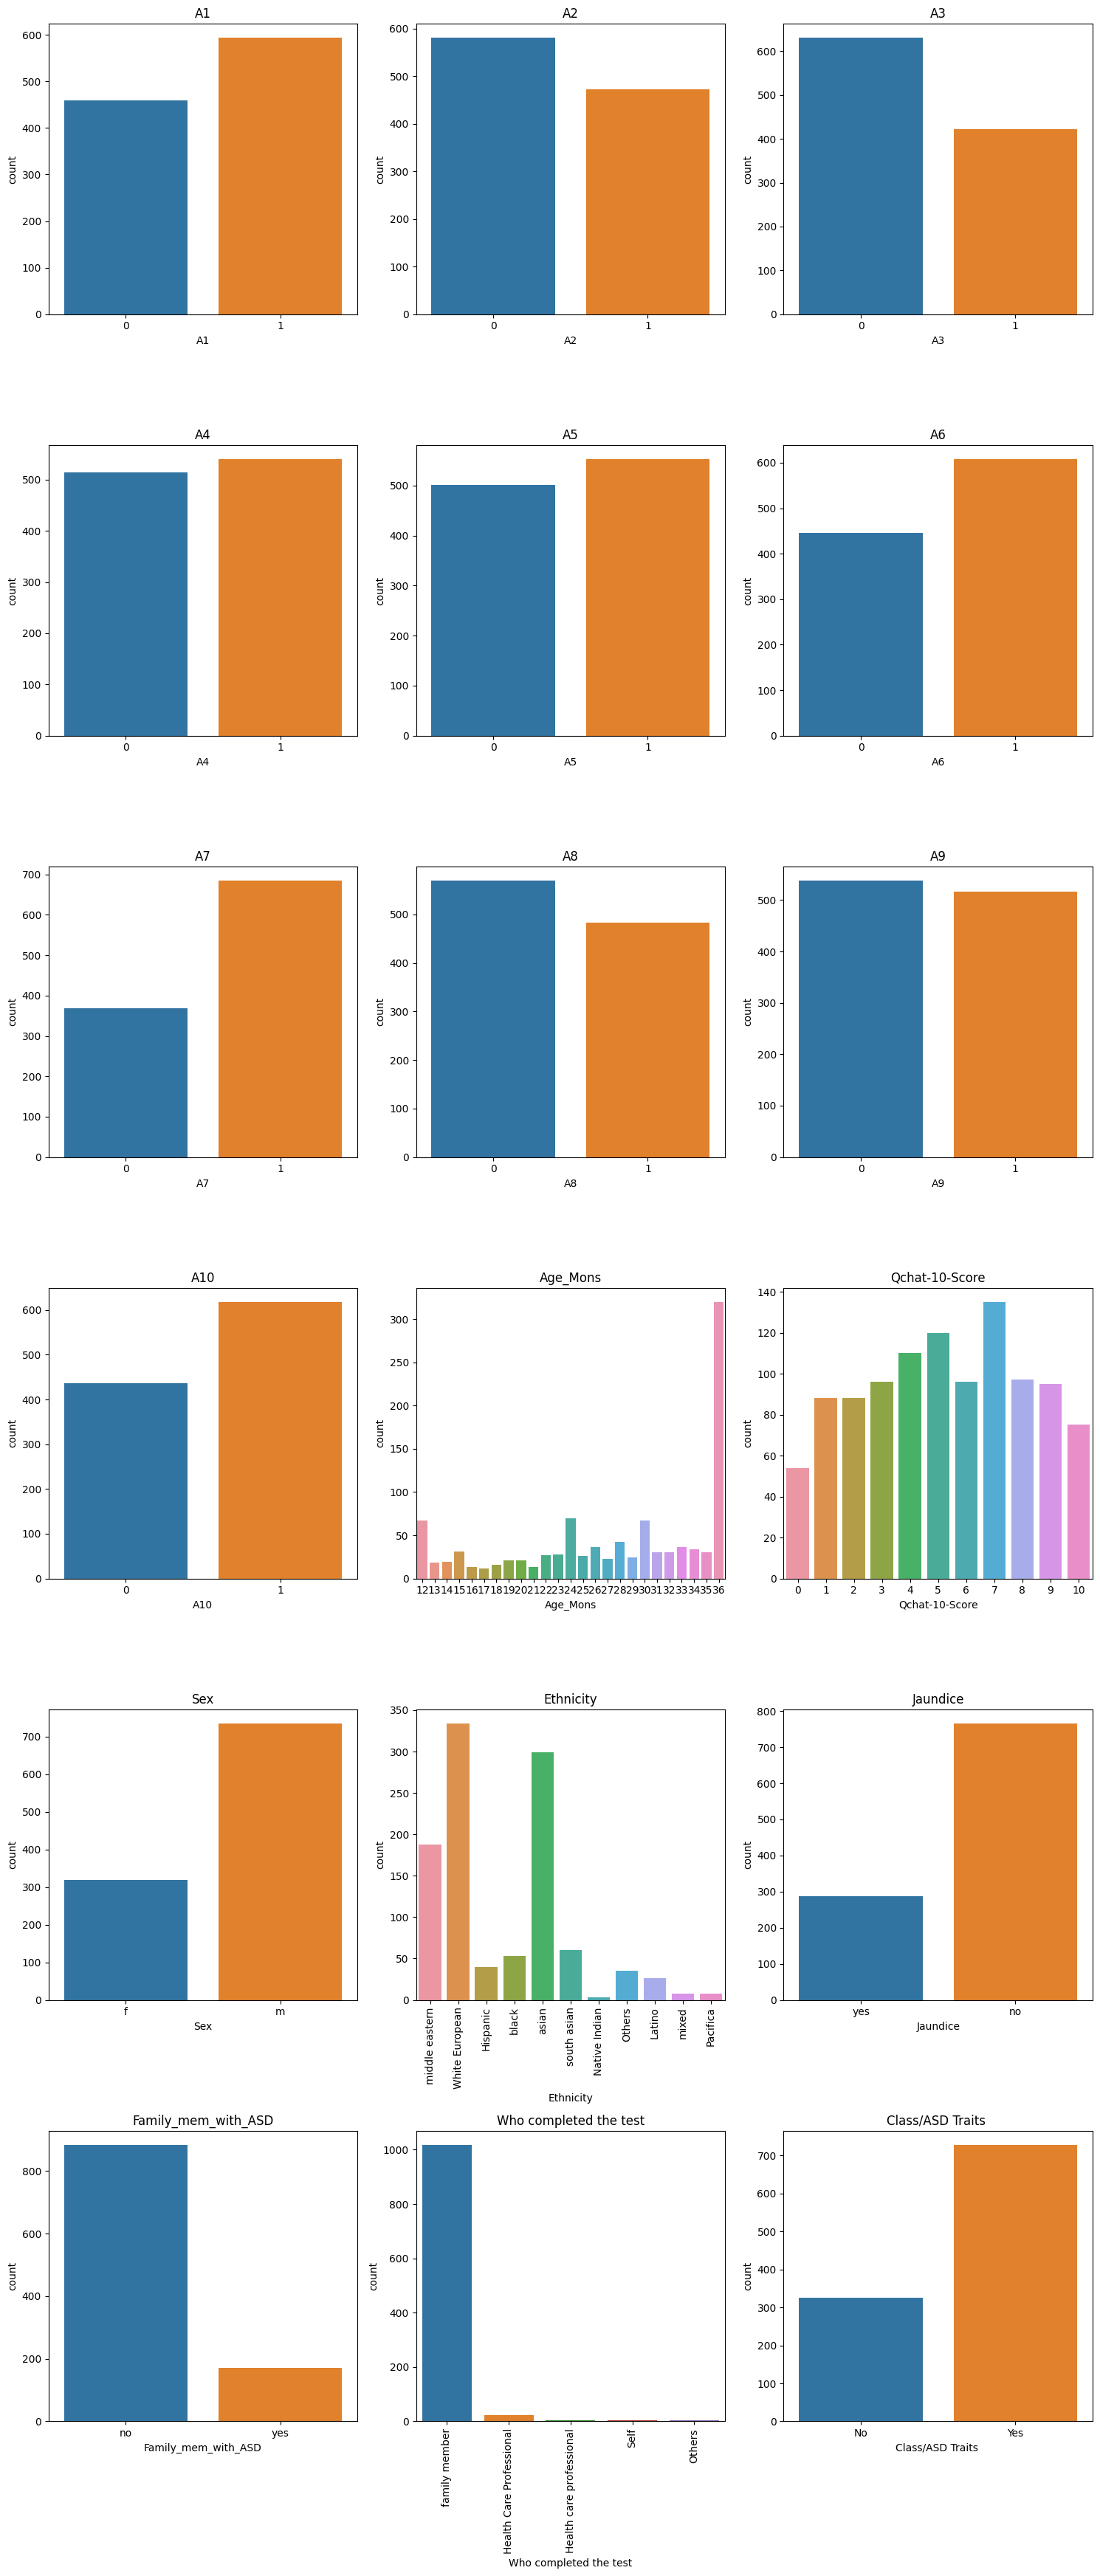

In [6]:
# Countplot for each feature
fig,axes=plt.subplots(6,3,figsize=(15,35))
axes=axes.ravel()
for i , col in enumerate(data.iloc[:,:]):
    sns.countplot(x=data[col],ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

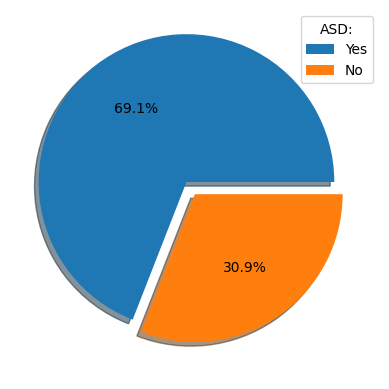

In [7]:
labels = ["Yes", "No"]
myexplode = [0.1, 0]
plt.pie(data.groupby('Class/ASD Traits ').size().reindex(labels),explode = myexplode, shadow = True,autopct='%1.1f%%')
plt.legend(title = "ASD:",labels = labels)
plt.show()

### An estimation can be made that around 69.1% toddlers in the world are affected from Autism Spectrum Disorder.

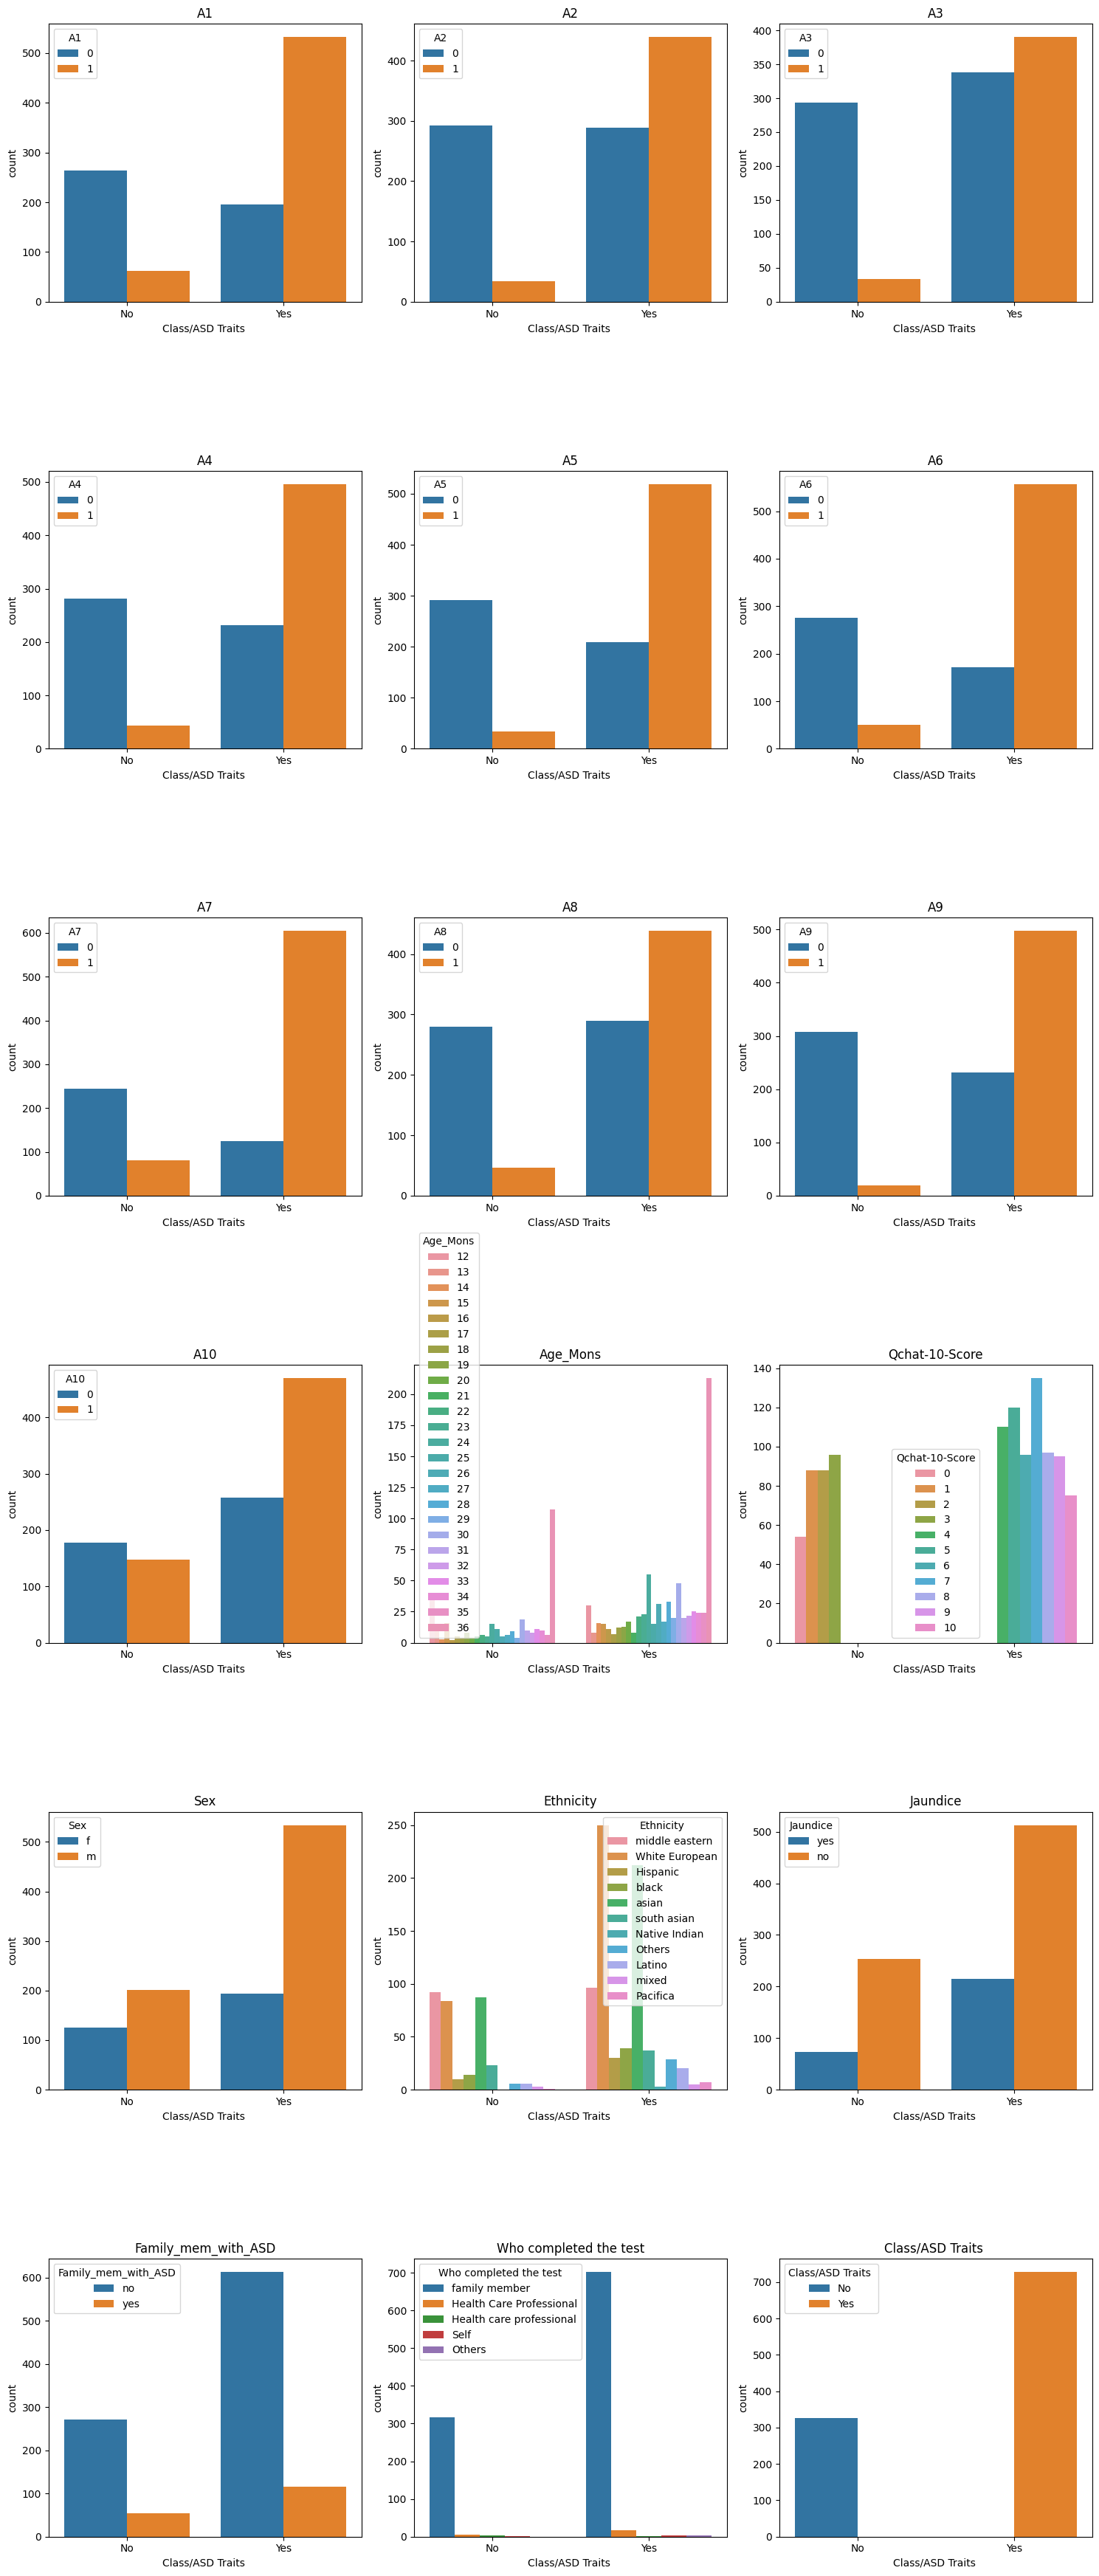

In [8]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, :]):
    sns.countplot(x=data["Class/ASD Traits "], hue=data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

# Analyzing Each column

### Ethnicity

In [9]:
data.groupby('Ethnicity').size()

Ethnicity
Hispanic           40
Latino             26
Native Indian       3
Others             35
Pacifica            8
White European    334
asian             299
black              53
middle eastern    188
mixed               8
south asian        60
dtype: int64

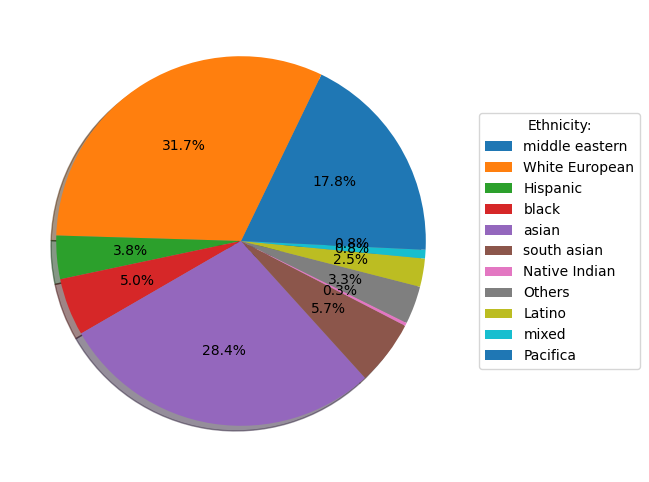

In [10]:
labels = ['middle eastern', 'White European', 'Hispanic', 'black', 'asian',
       'south asian', 'Native Indian', 'Others', 'Latino', 'mixed',
       'Pacifica']
plt.figure(figsize=(10, 6))
plt.pie(data.groupby('Ethnicity').size().reindex(labels), shadow = True,autopct='%1.1f%%')
plt.legend(title = "Ethnicity:",labels = labels,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### In our dataset the percentage of White European is maximum

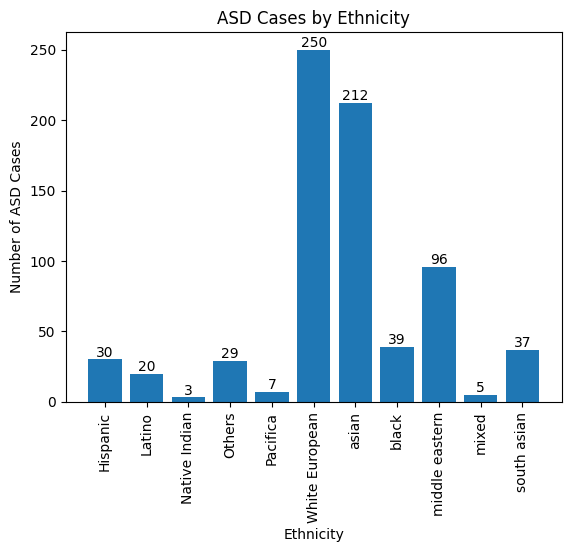

In [11]:
asd_counts_ethnicity = data[data['Class/ASD Traits '] == 'Yes'].groupby('Ethnicity').size()
bars=plt.bar(asd_counts_ethnicity.index, asd_counts_ethnicity.values)
plt.xlabel('Ethnicity')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Ethnicity')
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

### Conclusion : White Europeans have most cases of ASD around the world followed by asians.

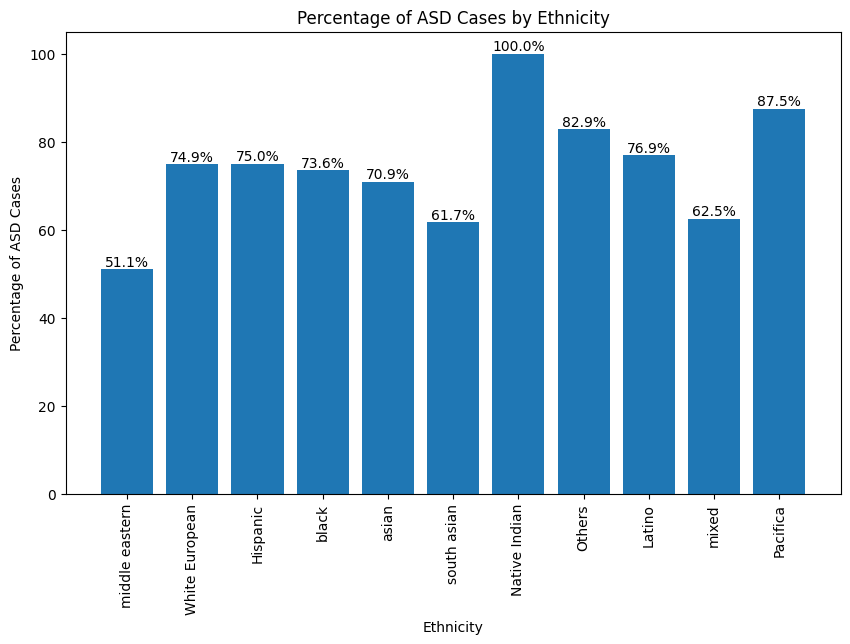

In [12]:
total_ethnicity_counts = data.groupby('Ethnicity').size()
asd_counts_ethnicity = data[data['Class/ASD Traits '] == 'Yes'].groupby('Ethnicity').size()
asd_percentage_ethnicity = (asd_counts_ethnicity / total_ethnicity_counts) * 100
plt.figure(figsize=(10, 6))
bars = plt.bar(asd_percentage_ethnicity.reindex(labels).index, asd_percentage_ethnicity.reindex(labels).values)
plt.xlabel('Ethnicity')
plt.ylabel('Percentage of ASD Cases')
plt.title('Percentage of ASD Cases by Ethnicity')
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', va='bottom', ha='center')
plt.show()

### Conclusion: Native Indian and Pacifica ethinicity are more prone to ASD.

### Sex

In [13]:
data.groupby('Sex').size()

Sex
f    319
m    735
dtype: int64

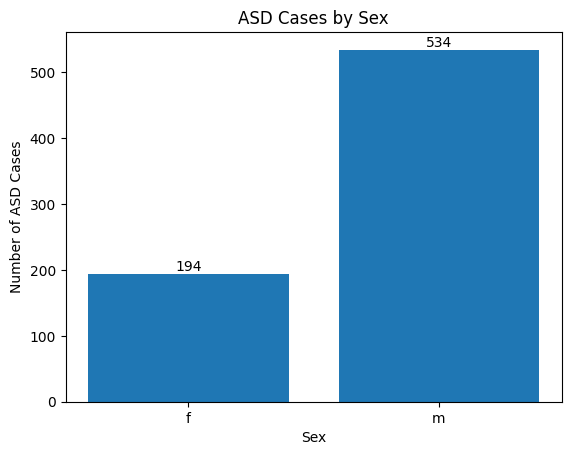

In [14]:
asd_counts_sex = data[data['Class/ASD Traits '] == 'Yes'].groupby('Sex').size()
bars=plt.bar(asd_counts_sex.index, asd_counts_sex.values)
plt.xlabel('Sex')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Sex')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

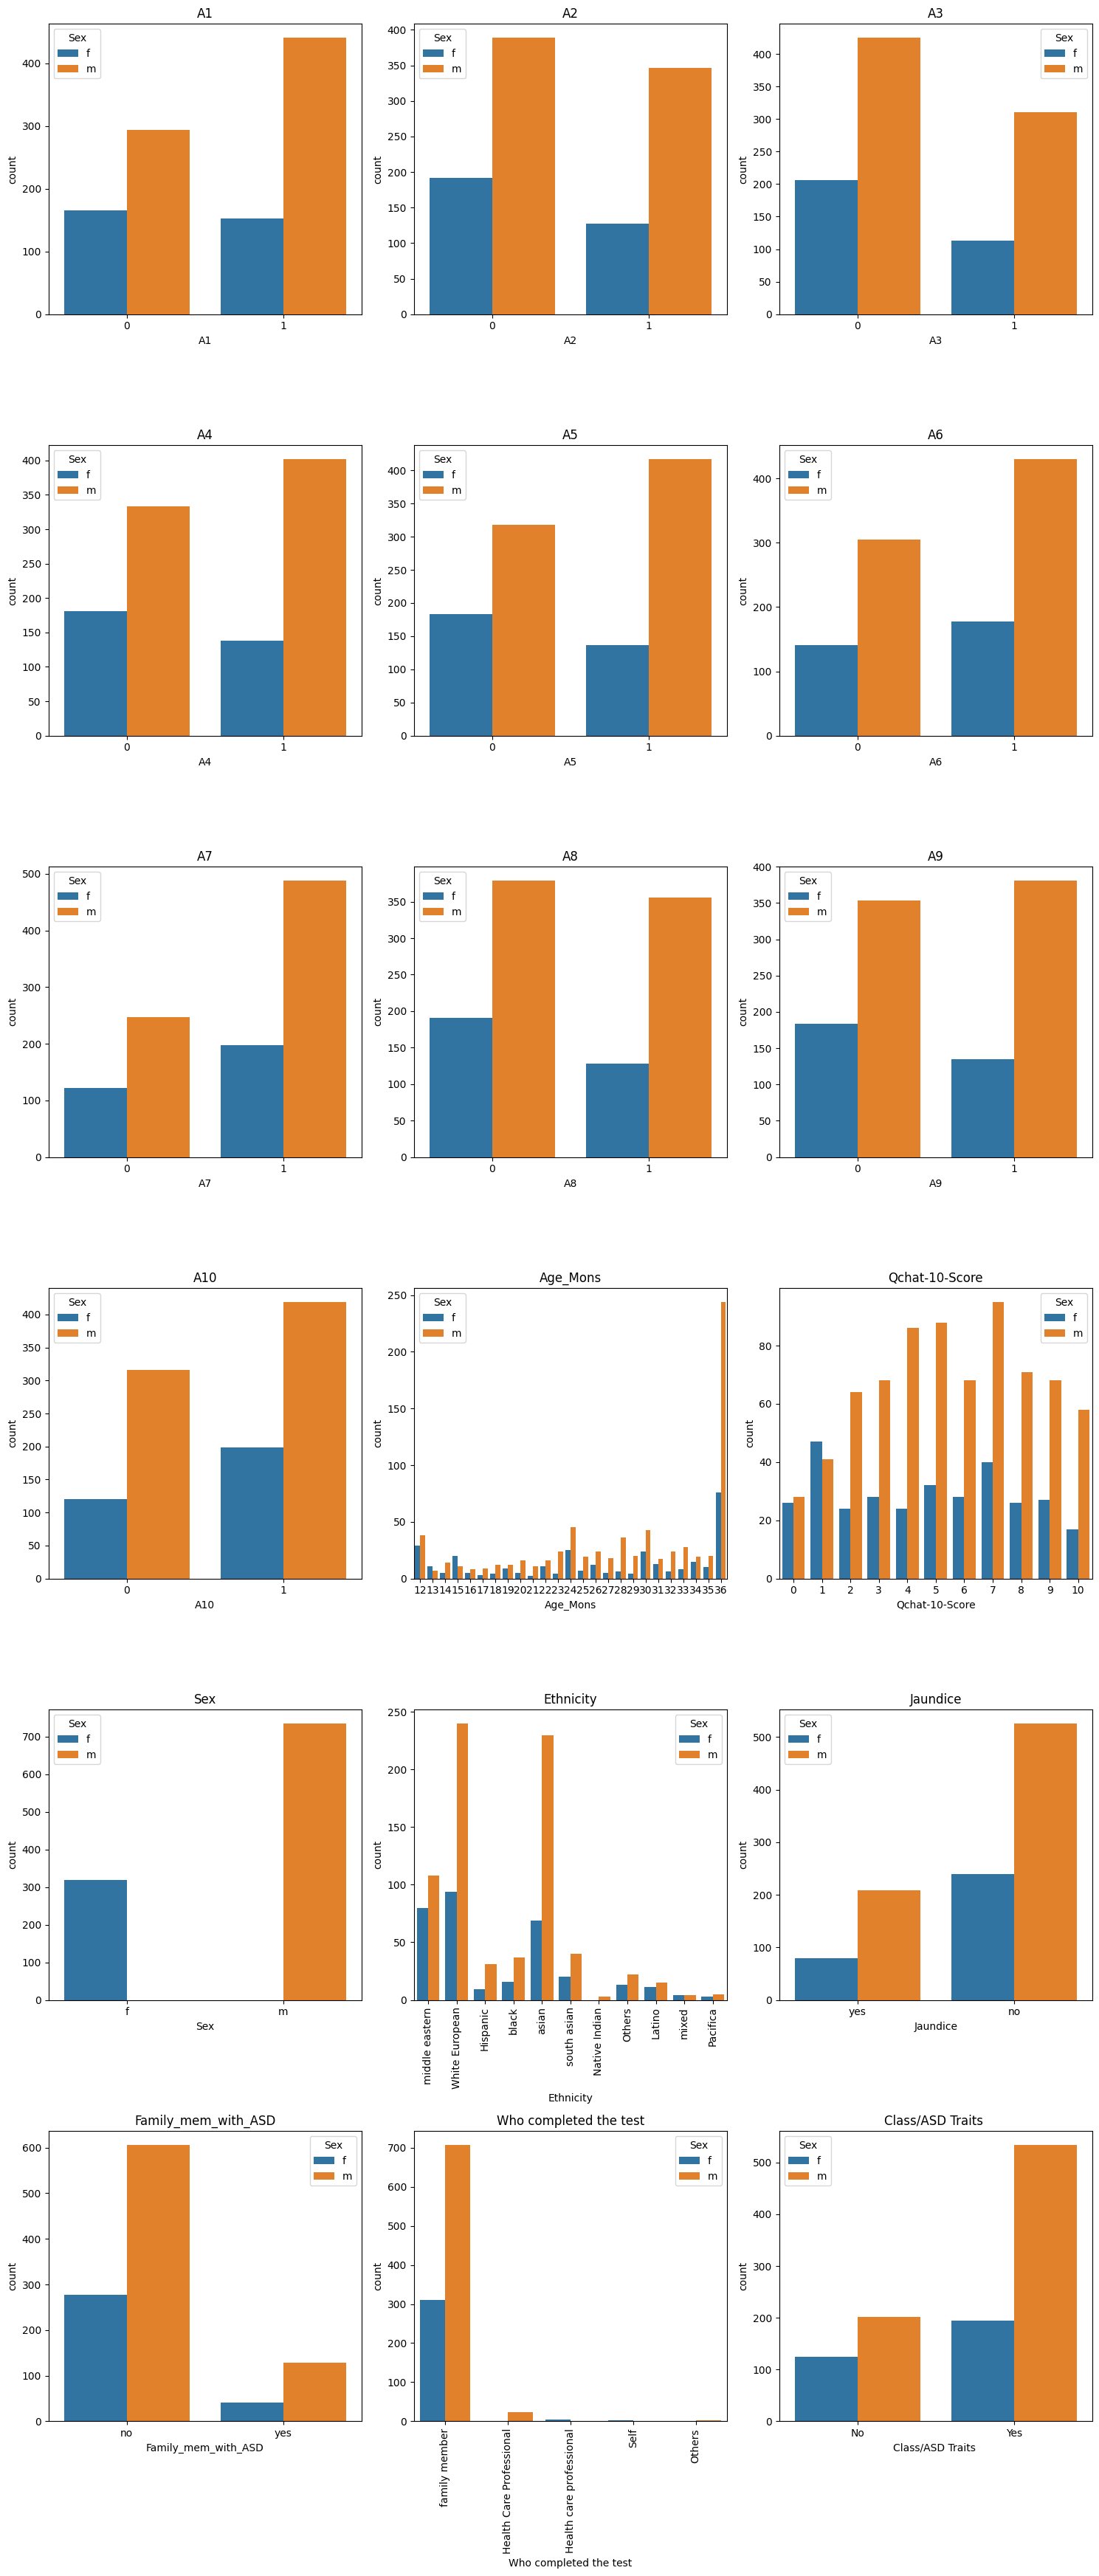

In [15]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, :]):
    sns.countplot(hue=data["Sex"], x=data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

### Conclusion : Males are more prone to ASD in comparision to Females

### Jaundice

In [16]:
data.groupby('Jaundice').size()

Jaundice
no     766
yes    288
dtype: int64

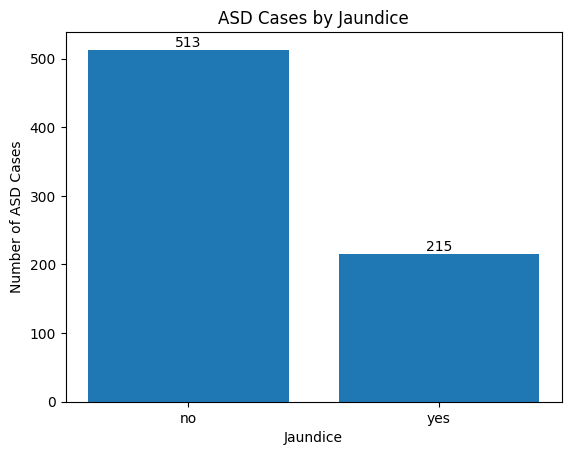

In [17]:
# Toddlers who have ASD and then they have Jaundice
asd_counts_jaundice = data[data['Class/ASD Traits '] == 'Yes'].groupby('Jaundice').size()
bars=plt.bar(asd_counts_jaundice.index, asd_counts_jaundice.values)
plt.xlabel('Jaundice')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Jaundice')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

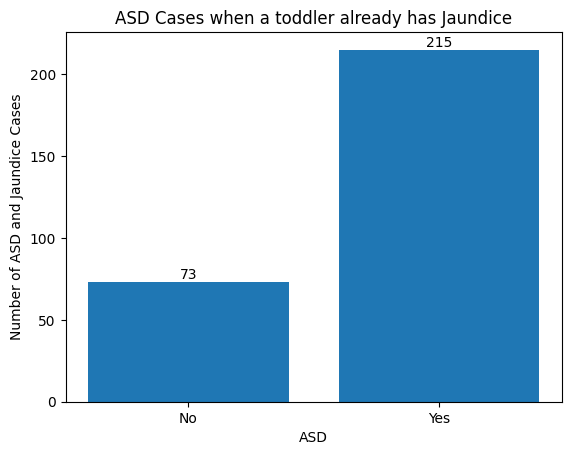

In [18]:
# Toddlers who have Jaundice and then they have ASD
asd_counts_jaundice = data[data['Jaundice']=='yes'].groupby('Class/ASD Traits ').size()
bars=plt.bar(asd_counts_jaundice.index, asd_counts_jaundice.values)
plt.xlabel('ASD')
plt.ylabel('Number of ASD and Jaundice Cases')
plt.title('ASD Cases when a toddler already has Jaundice')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

### Conclusion : The Toddlers having Jaundice are more prone to ASD in comparision to normal toddlers.

### Family_mem_with_ASD

In [19]:
data.groupby("Family_mem_with_ASD").size()

Family_mem_with_ASD
no     884
yes    170
dtype: int64

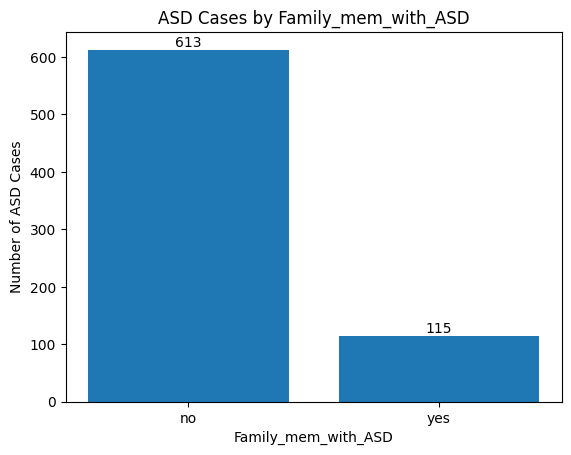

In [20]:
asd_counts = data[data['Class/ASD Traits '] == 'Yes'].groupby('Family_mem_with_ASD').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Family_mem_with_ASD')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Family_mem_with_ASD')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

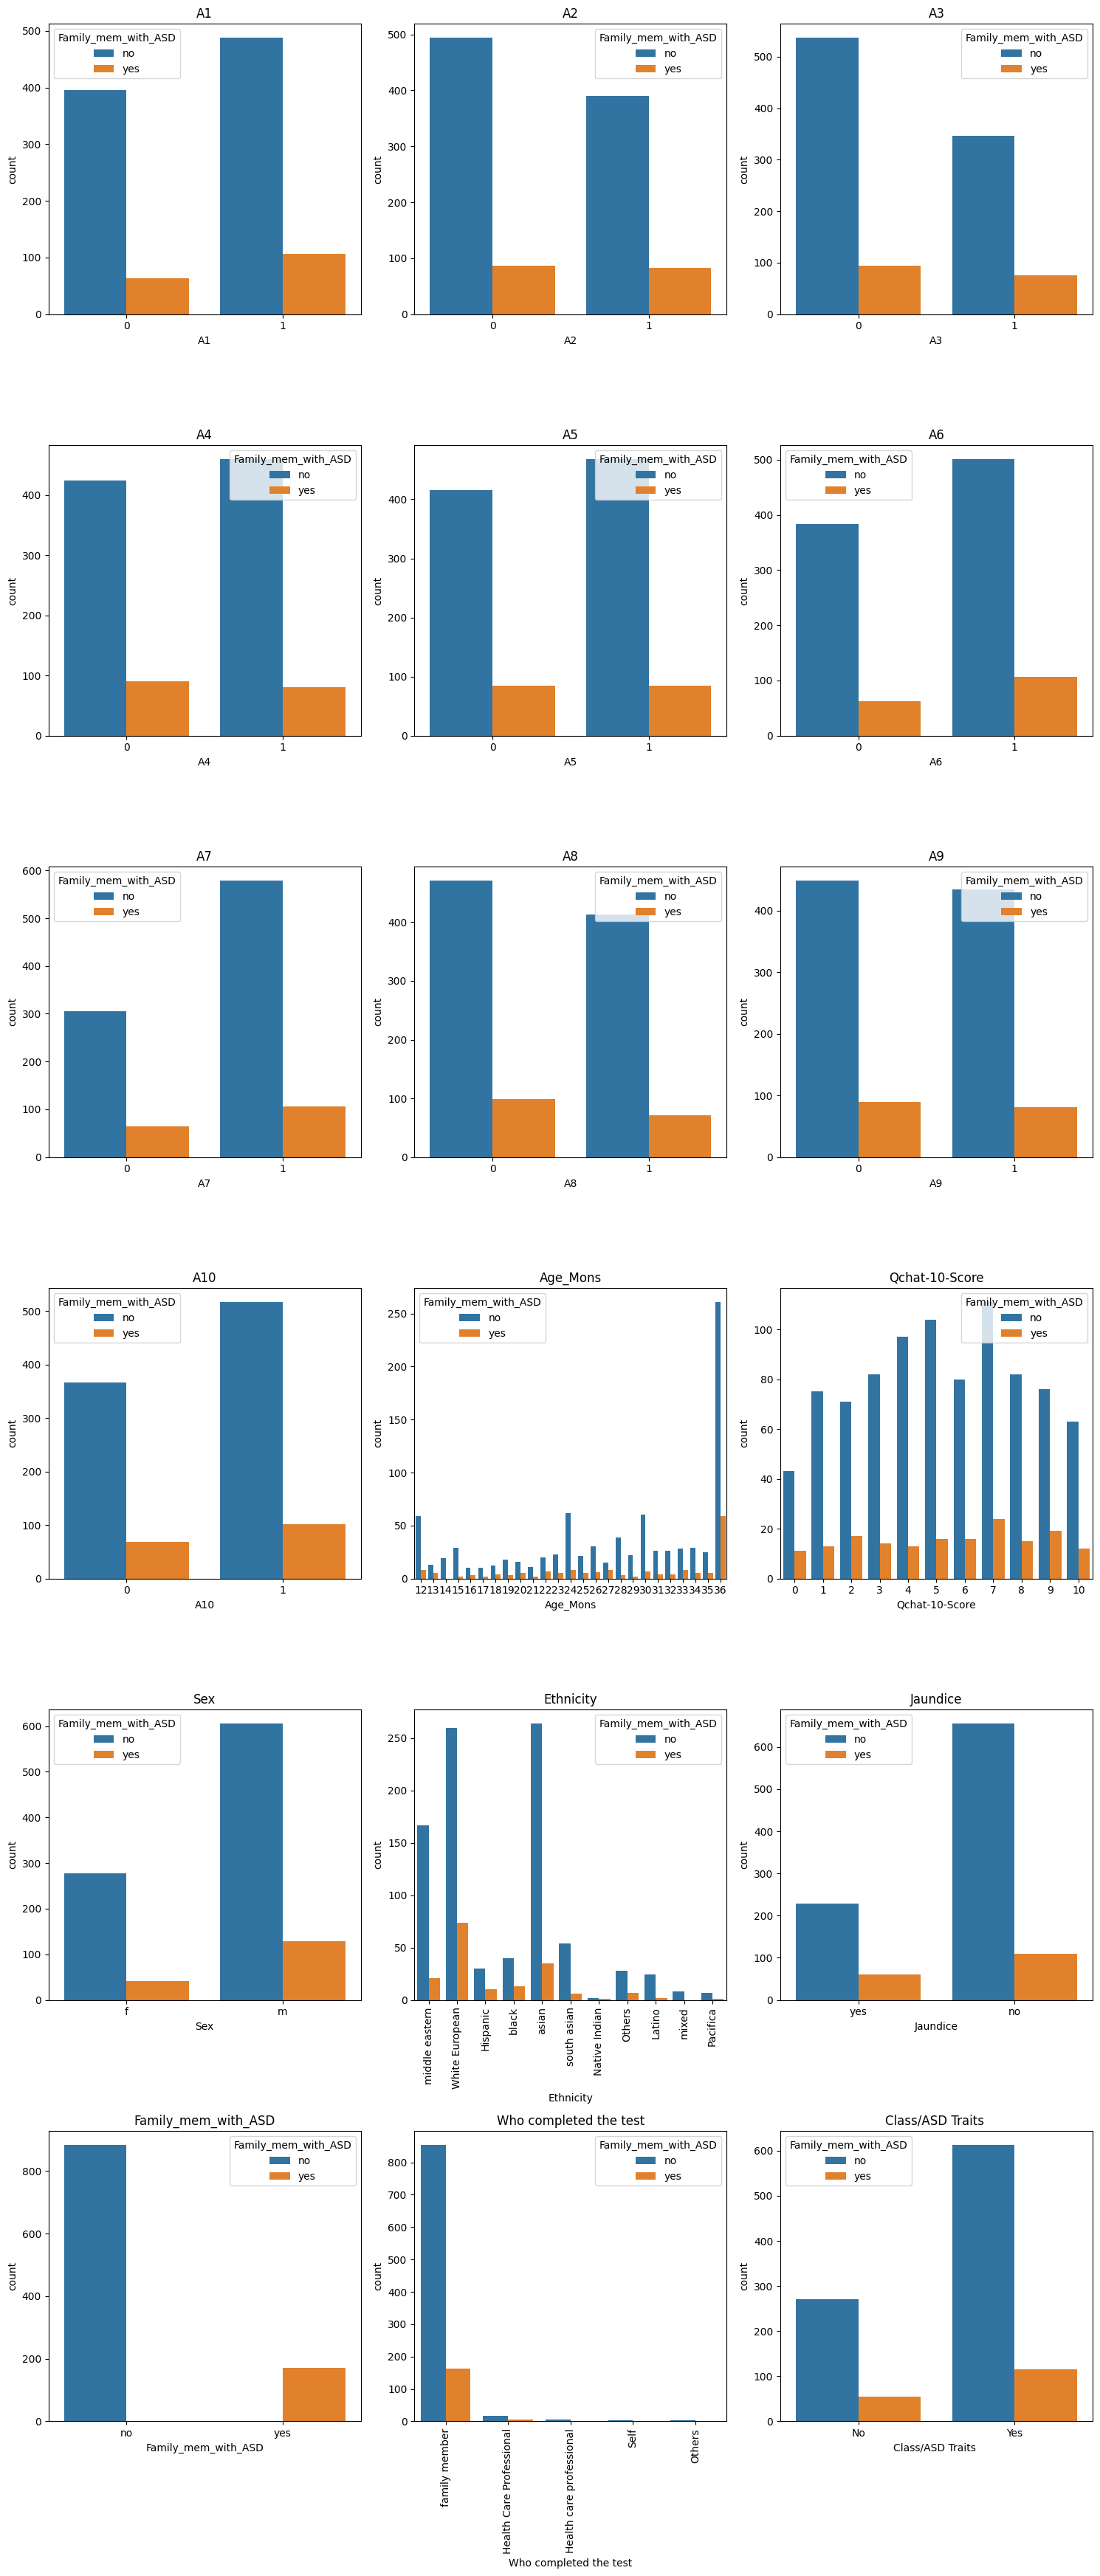

In [21]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, :]):
    sns.countplot(hue=data["Family_mem_with_ASD"], x=data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

### Conclusion : Most of the children with ASD around the world donot have their family members with ASD that means ASD is not a genetic disease.

### Who completed the test

In [22]:
data.groupby("Who completed the test").size()

Who completed the test
Health Care Professional      24
Health care professional       5
Others                         3
Self                           4
family member               1018
dtype: int64

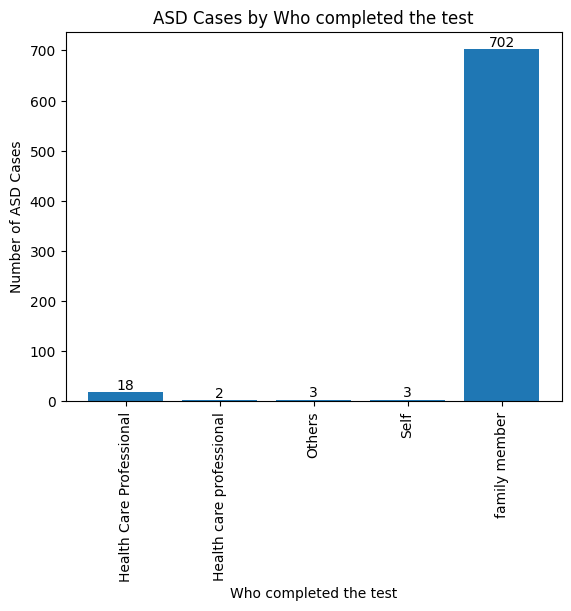

In [23]:
asd_counts = data[data['Class/ASD Traits '] == 'Yes'].groupby('Who completed the test').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Who completed the test')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Who completed the test')
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

### Conclusion : In most of the ASD cases around the world the test is completed by a family member

### Age_Mons

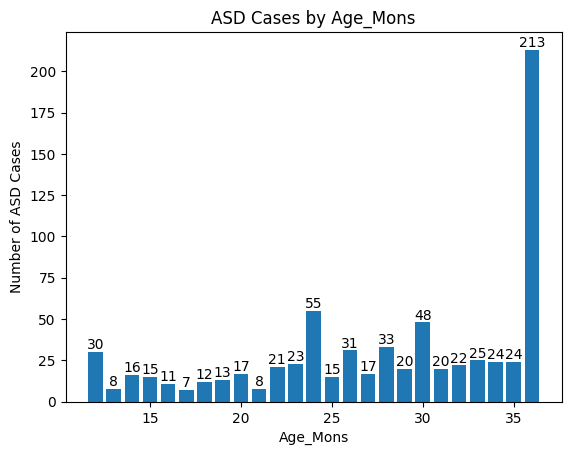

In [24]:
asd_counts = data[data['Class/ASD Traits '] == 'Yes'].groupby('Age_Mons').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Age_Mons')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Age_Mons')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

### Conclusion : Toddlers with age 36 months have most ASD cases around the world.

In [25]:
d = pd.DataFrame()
d["Age"]=(data["Age_Mons"]/12).astype(int)
d["ASD"]=data['Class/ASD Traits ']

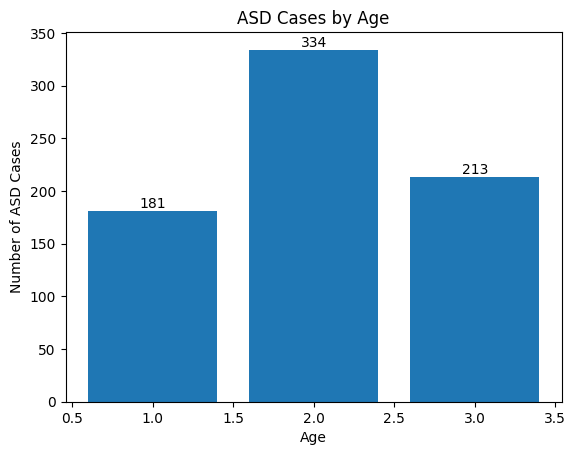

In [26]:
asd_counts = d[d['ASD'] == 'Yes'].groupby('Age').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Age')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Age')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

### Conclusion: The chances of getting affected by ASD are highest at the age of 2 years.

### Qchat-10-Score

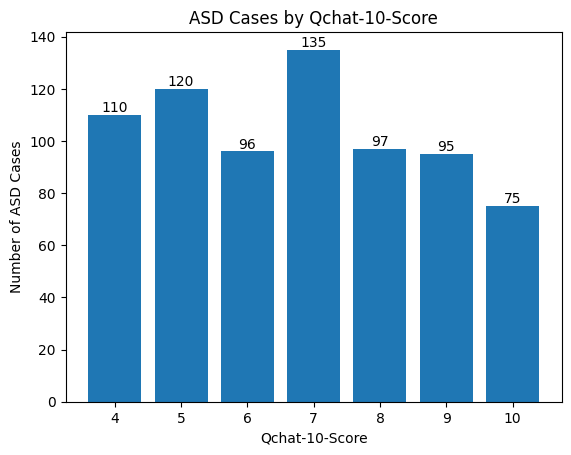

In [27]:
asd_counts = data[data['Class/ASD Traits '] == 'Yes'].groupby('Qchat-10-Score').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Qchat-10-Score')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Qchat-10-Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.xticks()
plt.show()

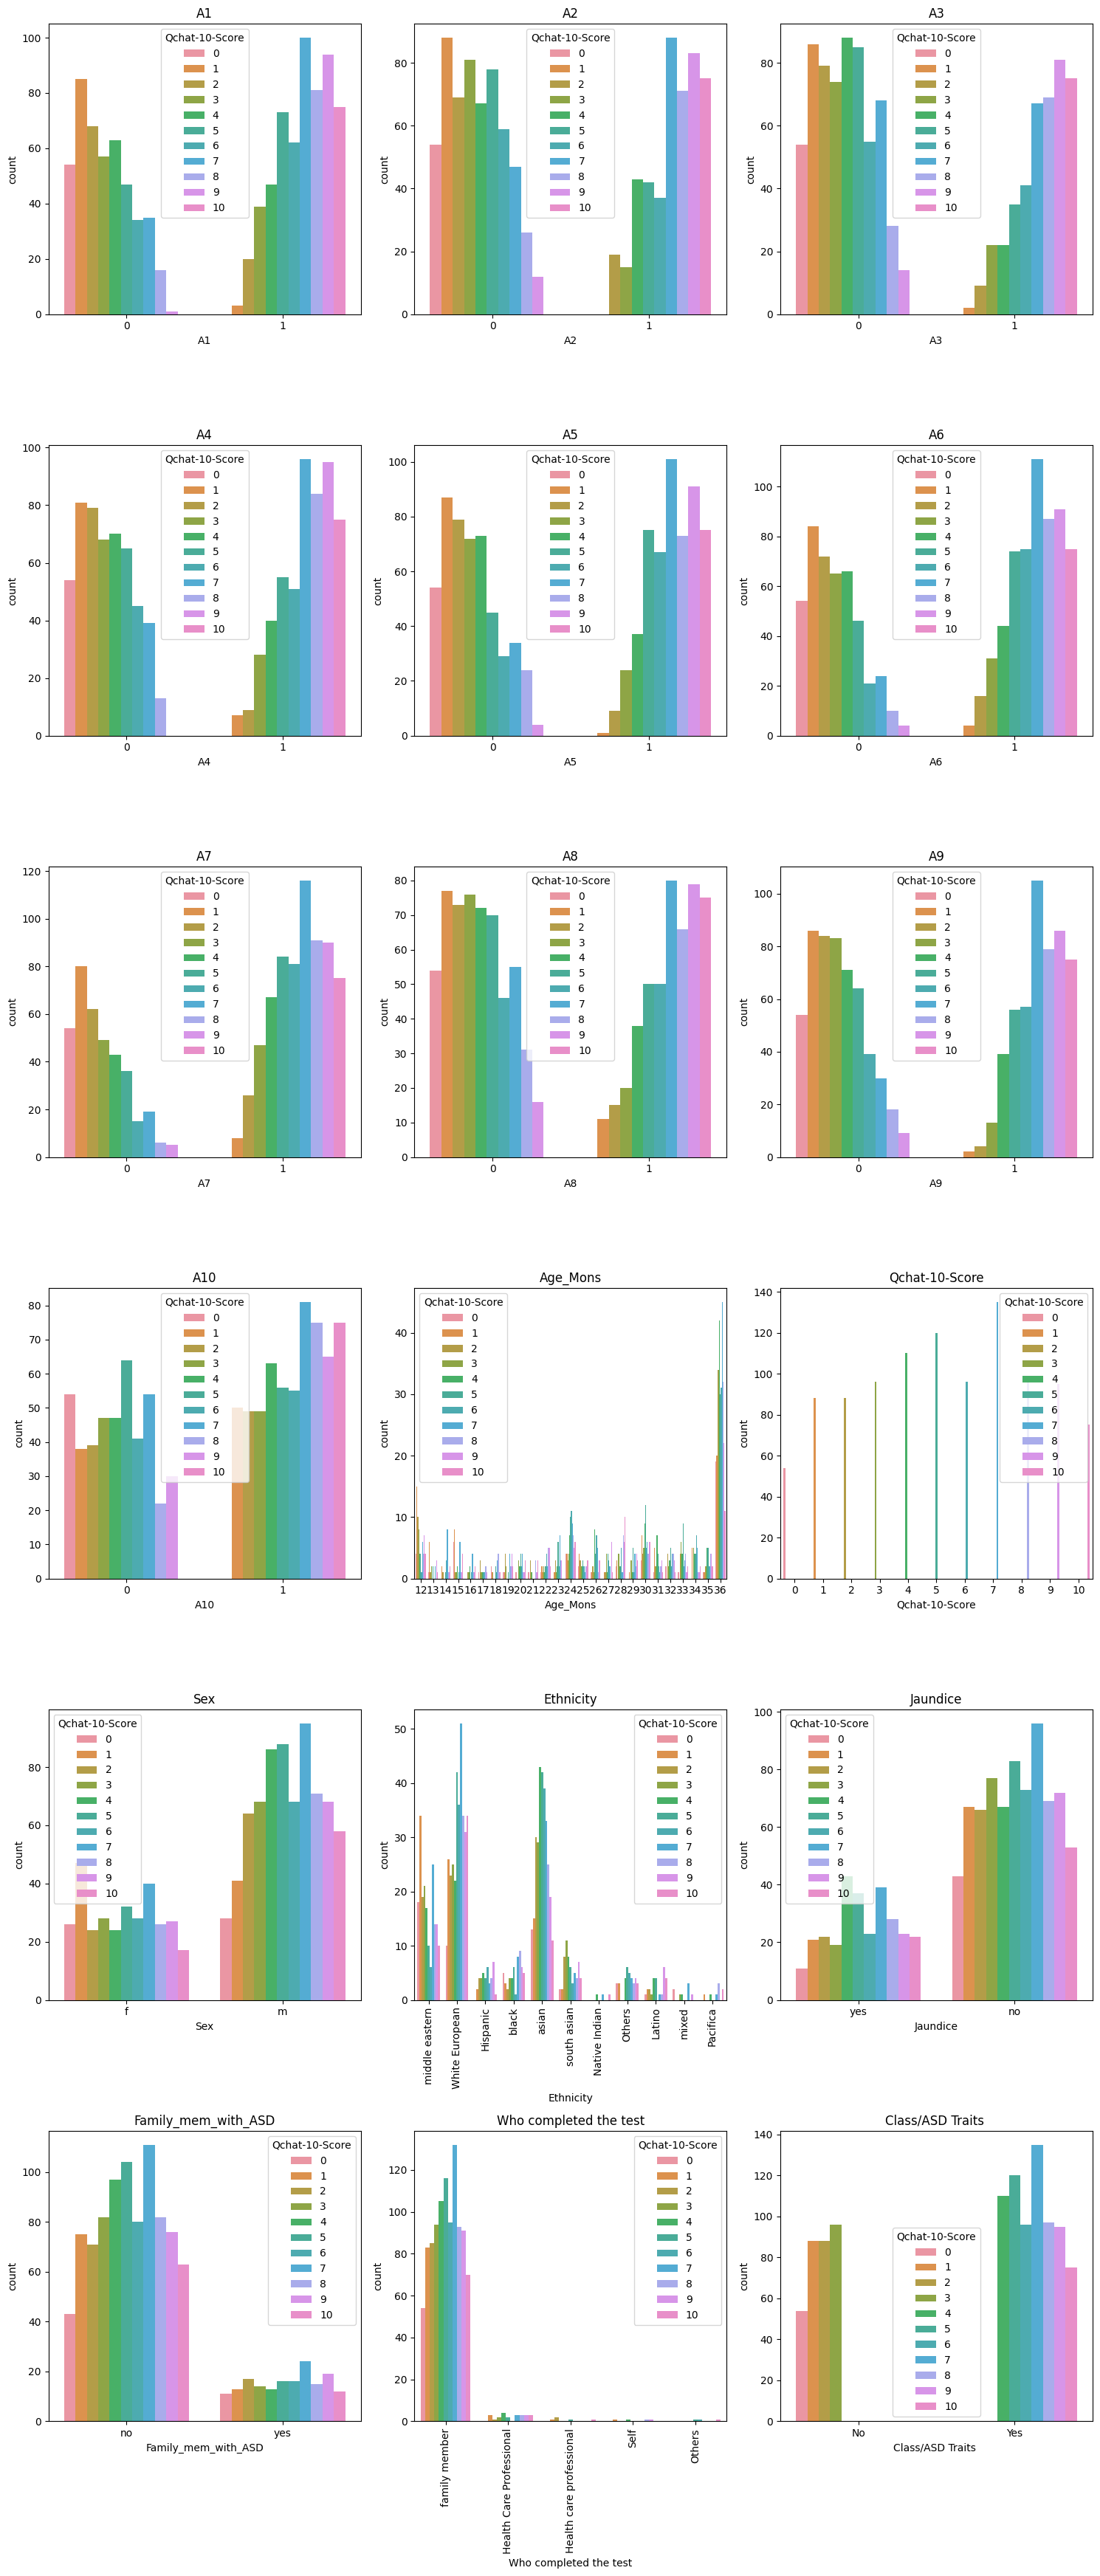

In [28]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, :]):
    sns.countplot(hue=data["Qchat-10-Score"], x=data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

### Conclusion : The toddlers with Qchat-10-Score value > 3 have ASD

### Question Columns 

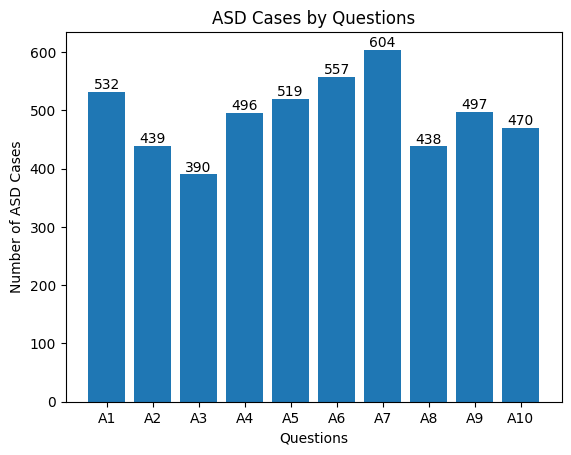

In [29]:
df=data[data['Class/ASD Traits '] == 'Yes']
sums=df[['A1', 'A2', 'A3', 'A4','A5','A6','A7','A8','A9','A10']].sum()
bars=plt.bar(sums.index,sums.values)
plt.xlabel('Questions')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Questions')
plt.xticks(ticks=range(len(sums.index)), labels=sums.index)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

### Conclusion: Maximum number of toddlers suffering from autism does not get upset when their loved one get upset. This shows us that most of the autism patients shows lack of emotion.

### Conclusion from the Analysis: 
    1. Males are more prone to ASD in comparision to females.
    2. 36 months old toddlers have highest number of ASD cases around the world.
    3. Toddlers with 2 years of age are more prone to ASD.
    4. ASD is not a hereditery disease.
    5. Toddlers having Jaundice are more prone to ASD in comparision to normal toddlers.

# Data Preprocessing

In [30]:
pd.set_option('display.max_columns', None)

In [31]:
d1 = pd.read_csv("/kaggle/input/autism-screening-for-toddlers/Toddler Autism dataset July 2018.csv")
d1.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [32]:
d1.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [33]:
d1["Age_Mons"]=(d1["Age_Mons"]/12).astype(int)
d1.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,2,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,3,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,3,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,2,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes


In [34]:
d2 = pd.read_csv("/kaggle/input/autismdatasets/data_csv.csv")
d2.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,1,3.0,2,3.0,Yes,Yes,Yes,Yes,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,0,6.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,7.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,1.0,2,10.0,Yes,Yes,No,Yes,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,3.0,2,9.0,Yes,Yes,No,Yes,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [35]:
d2.isna().sum()

CASE_NO_PATIENT'S                                      0
A1                                                     0
A2                                                     0
A3                                                     0
A4                                                     0
A5                                                     0
A6                                                     0
A7                                                     0
A8                                                     0
A9                                                     0
A10_Autism_Spectrum_Quotient                           0
Social_Responsiveness_Scale                            9
Age_Years                                              0
Qchat_10_Score                                        39
Speech Delay/Language Disorder                         0
Learning disorder                                      0
Genetic_Disorders                                      0
Depression                     

In [36]:
d2=d2.dropna()

In [37]:
d2.isna().sum()

CASE_NO_PATIENT'S                                     0
A1                                                    0
A2                                                    0
A3                                                    0
A4                                                    0
A5                                                    0
A6                                                    0
A7                                                    0
A8                                                    0
A9                                                    0
A10_Autism_Spectrum_Quotient                          0
Social_Responsiveness_Scale                           0
Age_Years                                             0
Qchat_10_Score                                        0
Speech Delay/Language Disorder                        0
Learning disorder                                     0
Genetic_Disorders                                     0
Depression                                      

In [38]:
d3 = pd.read_csv("/kaggle/input/autismdatasets/autism_screening.csv")
d3.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [39]:
d3.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [40]:
d3=d3.dropna()

In [41]:
d3.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [42]:
d3["age"]=(d3["age"]/12).astype(int)
d3.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,2,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,2,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,2,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,2,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,3,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [43]:
print(d1.columns)
print(d2.columns)
print(d3.columns)

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')
Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')
Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 

In [44]:
d1=d1.iloc[:,1:]
d2=pd.concat([d2.iloc[:,1:11],d2.iloc[:,[12,13,22,23,24,25,26,27]]],axis=1)
d3=pd.concat([d3.iloc[:,0:11],d3.iloc[:,[17,11,12,13,14,19,20]]],axis=1)

In [45]:
d1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,2,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,3,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes


In [46]:
d2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,2,3.0,F,middle eastern,Yes,No,Family Member,No
1,1,1,0,0,0,1,1,0,0,0,3,4.0,M,White European,Yes,No,Family Member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4.0,M,Middle Eastern,Yes,No,Family Member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10.0,M,Hispanic,No,No,Family Member,Yes
4,1,1,0,1,1,1,1,1,1,1,2,9.0,F,White European,No,No,Family Member,Yes


In [47]:
d3.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,gender,ethnicity,jundice,austim,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,2,6.0,f,White-European,no,no,Self,NO
1,1,1,0,1,0,0,0,1,0,1,2,5.0,m,Latino,no,yes,Self,NO
2,1,1,0,1,1,0,1,1,1,1,2,8.0,m,Latino,yes,yes,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,2,6.0,f,White-European,no,yes,Self,NO
4,1,0,0,0,0,0,0,1,0,0,3,2.0,f,?,no,no,?,NO


In [48]:
d1.columns = d2.columns
d3.columns = d2.columns

In [49]:
d1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,2,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,3,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes


In [50]:
d2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,2,3.0,F,middle eastern,Yes,No,Family Member,No
1,1,1,0,0,0,1,1,0,0,0,3,4.0,M,White European,Yes,No,Family Member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4.0,M,Middle Eastern,Yes,No,Family Member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10.0,M,Hispanic,No,No,Family Member,Yes
4,1,1,0,1,1,1,1,1,1,1,2,9.0,F,White European,No,No,Family Member,Yes


In [51]:
d3.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,1,1,1,0,0,1,1,0,0,2,6.0,f,White-European,no,no,Self,NO
1,1,1,0,1,0,0,0,1,0,1,2,5.0,m,Latino,no,yes,Self,NO
2,1,1,0,1,1,0,1,1,1,1,2,8.0,m,Latino,yes,yes,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,2,6.0,f,White-European,no,yes,Self,NO
4,1,0,0,0,0,0,0,1,0,0,3,2.0,f,?,no,no,?,NO


In [52]:
for i in d1.columns:
    print(i)
    print(f"{d1[i].unique()}\n")

A1
[0 1]

A2
[0 1]

A3
[0 1]

A4
[0 1]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[1 0]

Age_Years
[2 3 1]

Qchat_10_Score
[ 3  4 10  9  8  5  6  2  0  7  1]

Sex
['f' 'm']

Ethnicity
['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica']

Jaundice
['yes' 'no']

Family_mem_with_ASD
['no' 'yes']

Who_completed_the_test
['family member' 'Health Care Professional' 'Health care professional'
 'Self' 'Others']

ASD_traits
['No' 'Yes']



In [53]:
for i in d2.columns:
    print(i)
    print(f"{d2[i].unique()}\n")

A1
[0 1]

A2
[0 1]

A3
[0 1]

A4
[0 1]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[1 0]

Age_Years
[ 2  3  1 15 18 12  4  5  9  6  8  7 17 16 14 11 13 10]

Qchat_10_Score
[ 3.  4. 10.  9.  8.  5.  6.  2.  7.  0.  1.]

Sex
['F' 'M']

Ethnicity
['middle eastern' 'White European' 'Middle Eastern' 'Hispanic' 'Black'
 'Asian' 'South Asian' 'Native Indian' 'Others' 'black' 'asian' 'Latino'
 'Mixed' 'south asian' 'mixed' 'PaciFica']

Jaundice
['Yes' 'No']

Family_mem_with_ASD
['No' 'Yes']

Who_completed_the_test
['Family Member' 'Health Care Professional' 'Self' 'Family member'
 'Others' 'School and NGO']

ASD_traits
['No' 'Yes']



In [54]:
for i in d3.columns:
    print(i)
    print(f"{d3[i].unique()}\n")

A1
[1 0]

A2
[1 0]

A3
[1 0]

A4
[1 0]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[0 1]

Age_Years
[ 2  3  1  5  4 31]

Qchat_10_Score
[ 6.  5.  8.  2.  9. 10.  4.  3.  0.  1.  7.]

Sex
['f' 'm']

Ethnicity
['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']

Jaundice
['no' 'yes']

Family_mem_with_ASD
['no' 'yes']

Who_completed_the_test
['Self' 'Parent' '?' 'Health care professional' 'Relative' 'Others']

ASD_traits
['NO' 'YES']



In [55]:
data=pd.concat([d1,d2,d3],axis=0)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,2,3.0,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,3,4.0,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4.0,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10.0,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,1,9.0,f,White European,no,yes,family member,Yes


In [56]:
for i in data.columns:
    print(i)
    print(f"{data[i].unique()}\n")

A1
[0 1]

A2
[0 1]

A3
[0 1]

A4
[0 1]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[1 0]

Age_Years
[ 2  3  1 15 18 12  4  5  9  6  8  7 17 16 14 11 13 10 31]

Qchat_10_Score
[ 3.  4. 10.  9.  8.  5.  6.  2.  0.  7.  1.]

Sex
['f' 'm' 'F' 'M']

Ethnicity
['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica'
 'Middle Eastern' 'Black' 'Asian' 'South Asian' 'Mixed' 'PaciFica'
 'White-European' '?' 'Middle Eastern ' 'Pasifika' 'Turkish' 'others']

Jaundice
['yes' 'no' 'Yes' 'No']

Family_mem_with_ASD
['no' 'yes' 'No' 'Yes']

Who_completed_the_test
['family member' 'Health Care Professional' 'Health care professional'
 'Self' 'Others' 'Family Member' 'Family member' 'School and NGO' 'Parent'
 '?' 'Relative']

ASD_traits
['No' 'Yes' 'NO' 'YES']



In [57]:
replacements = {
    'f': 'F',
    'm': 'M',
}
data['Sex'] = data['Sex'].replace(replacements)
replacements = {
    'yes': 'Yes',
    'no': 'No',
}
data['Jaundice'] = data['Jaundice'].replace(replacements)
replacements = {
    'yes': 'Yes',
    'no': 'No',
}
data['Family_mem_with_ASD'] = data['Family_mem_with_ASD'].replace(replacements)
replacements = {
    'YES': 'Yes',
    'NO': 'No',
}
data['ASD_traits'] = data['ASD_traits'].replace(replacements)

In [58]:
replacements = {
    'middle eastern': 'Middle Eastern',
    'Middle Eastern ': 'Middle Eastern',
    'mixed': 'Mixed',
    'asian': 'Asian',
    'black': 'Black',
    'south asian': 'South Asian',
    'PaciFica':'Pacifica',
    'Pasifika':'Pacifica'
    
}
data['Ethnicity'] = data['Ethnicity'].replace(replacements)

In [59]:
replacements = {
    'Health care professional':'Health Care Professional',
    'family member':'Family Member',
    'Family member':'Family Member'
}
data['Who_completed_the_test'] = data['Who_completed_the_test'].replace(replacements)

In [60]:
for i in data.columns:
    print(i)
    print(f"{data[i].unique()}\n")

A1
[0 1]

A2
[0 1]

A3
[0 1]

A4
[0 1]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[1 0]

Age_Years
[ 2  3  1 15 18 12  4  5  9  6  8  7 17 16 14 11 13 10 31]

Qchat_10_Score
[ 3.  4. 10.  9.  8.  5.  6.  2.  0.  7.  1.]

Sex
['F' 'M']

Ethnicity
['Middle Eastern' 'White European' 'Hispanic' 'Black' 'Asian'
 'South Asian' 'Native Indian' 'Others' 'Latino' 'Mixed' 'Pacifica'
 'White-European' '?' 'Turkish' 'others']

Jaundice
['Yes' 'No']

Family_mem_with_ASD
['No' 'Yes']

Who_completed_the_test
['Family Member' 'Health Care Professional' 'Self' 'Others'
 'School and NGO' 'Parent' '?' 'Relative']

ASD_traits
['No' 'Yes']



In [61]:
X = data.drop("ASD_traits",axis=1)
y = data["ASD_traits"]

# Encoding categorical data

In [62]:
# One Hot Encoding
X=pd.get_dummies(X,columns=["Ethnicity", "Who_completed_the_test"], drop_first=True)

In [63]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
X['Sex']=le.fit_transform(X['Sex'])
X['Jaundice']=le.fit_transform(X['Jaundice'])
X['Family_mem_with_ASD']=le.fit_transform(X['Family_mem_with_ASD'])

# Splitting of Data

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=69)

# Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

# Model Implementation

In [66]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
def train_model(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    matrix=confusion_matrix(y_test,y_pred)
    print("Confusion Matrix is: ")
    print(matrix)
    print("\n\nScore Table is: ")
    score_df = pd.DataFrame([[accuracy, precision, recall, f1]], 
                            columns=["accuracy", "precision", "recall", "f1"])
    
    return score_df

In [67]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
result=train_model(model,X_train_scaled, y_train, X_test_scaled, y_test)
result.index=["Logistic Regression"]
result

Confusion Matrix is: 
[[311  33]
 [ 37 355]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.904891,0.914948,0.905612,0.910256


In [68]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
dt = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
dt.index = ["Decision Tree Classifier"]
result = pd.concat([result, dt])
result


Confusion Matrix is: 
[[336   8]
 [  6 386]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.904891,0.914948,0.905612,0.910256
Decision Tree Classifier,0.980978,0.979695,0.984694,0.982188


In [69]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
rfc = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
rfc.index = ["Random Forest Classifier"]
result = pd.concat([result, rfc])
result

Confusion Matrix is: 
[[339   5]
 [  2 390]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.904891,0.914948,0.905612,0.910256
Decision Tree Classifier,0.980978,0.979695,0.984694,0.982188
Random Forest Classifier,0.990489,0.987342,0.994898,0.991105


In [70]:
# XGBoost Classifier
from xgboost import XGBClassifier
model = XGBClassifier()
xg = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
xg.index = ["XGBoost Classifier"]
result = pd.concat([result, xg])
result

Confusion Matrix is: 
[[339   5]
 [  2 390]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.904891,0.914948,0.905612,0.910256
Decision Tree Classifier,0.980978,0.979695,0.984694,0.982188
Random Forest Classifier,0.990489,0.987342,0.994898,0.991105
XGBoost Classifier,0.990489,0.987342,0.994898,0.991105


In [71]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
gb = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
gb.index = ["Gradient Boosting Classifier"]
result = pd.concat([result, gb])
result

Confusion Matrix is: 
[[337   7]
 [  3 389]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.904891,0.914948,0.905612,0.910256
Decision Tree Classifier,0.980978,0.979695,0.984694,0.982188
Random Forest Classifier,0.990489,0.987342,0.994898,0.991105
XGBoost Classifier,0.990489,0.987342,0.994898,0.991105
Gradient Boosting Classifier,0.986413,0.982323,0.992347,0.987310


In [72]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
adb = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
adb.index = ["Ada Boost Classifier"]
result = pd.concat([result, adb])
result

Confusion Matrix is: 
[[327  17]
 [ 11 381]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.904891,0.914948,0.905612,0.910256
Decision Tree Classifier,0.980978,0.979695,0.984694,0.982188
Random Forest Classifier,0.990489,0.987342,0.994898,0.991105
XGBoost Classifier,0.990489,0.987342,0.994898,0.991105
Gradient Boosting Classifier,0.986413,0.982323,0.992347,0.987310
Ada Boost Classifier,0.961957,0.957286,0.971939,0.964557


In [73]:
# Support Vector Machine
from sklearn.svm import SVC
model = SVC()
svm = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
svm.index = ["SVM Classifier"]
result = pd.concat([result, svm])
result

Confusion Matrix is: 
[[331  13]
 [ 10 382]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.904891,0.914948,0.905612,0.910256
Decision Tree Classifier,0.980978,0.979695,0.984694,0.982188
Random Forest Classifier,0.990489,0.987342,0.994898,0.991105
XGBoost Classifier,0.990489,0.987342,0.994898,0.991105
Gradient Boosting Classifier,0.986413,0.982323,0.992347,0.987310
Ada Boost Classifier,0.961957,0.957286,0.971939,0.964557
SVM Classifier,0.968750,0.967089,0.974490,0.970775


In [74]:
# Artificial Neural Networks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()

In [75]:
# Adding input layer
model.add(Dense(64, activation="relu", input_dim=36))

In [76]:
# Adding First Hidden Layer
model.add(Dense(64, activation="relu"))

In [77]:
# Adding Output Layer
model.add(Dense(1, activation="sigmoid"))

In [78]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=None
)
train = model.fit(X_train_scaled, y_train, batch_size=20, epochs=100, validation_split=0.2, callbacks=callback)

Epoch 1/100
118/118 [==============================] - 1s 4ms/step - loss: 0.3558 - accuracy: 0.8356 - val_loss: 0.1931 - val_accuracy: 0.9185
Epoch 2/100
118/118 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9265 - val_loss: 0.1343 - val_accuracy: 0.9508
Epoch 3/100
118/118 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9537 - val_loss: 0.1033 - val_accuracy: 0.9593
Epoch 4/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9724 - val_loss: 0.0906 - val_accuracy: 0.9711
Epoch 5/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9834 - val_loss: 0.0825 - val_accuracy: 0.9762
Epoch 6/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9877 - val_loss: 0.0717 - val_accuracy: 0.9830
Epoch 7/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9915 - val_loss: 0.0576 - val_accuracy: 0.9864

In [79]:
y_prob = model.predict(X_test_scaled)
y_pred = np.where(y_prob > 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"{accuracy} , {precision} , {recall} , {f1}")

23/23 [==============================] - 0s 1ms/step
0.9877717391304348 , 0.989769820971867 , 0.9872448979591837 , 0.9885057471264369


In [80]:
dframe = pd.DataFrame([[accuracy, precision, recall, f1]], 
                     columns=['accuracy', 'precision', 'recall', 'f1'])
dframe.index = ["Artificial Neural Network"]
result = pd.concat([result, dframe])
result

,accuracy,precision,recall,f1
Logistic Regression,0.904891,0.914948,0.905612,0.910256
Decision Tree Classifier,0.980978,0.979695,0.984694,0.982188
Random Forest Classifier,0.990489,0.987342,0.994898,0.991105
XGBoost Classifier,0.990489,0.987342,0.994898,0.991105
Gradient Boosting Classifier,0.986413,0.982323,0.992347,0.987310
Ada Boost Classifier,0.961957,0.957286,0.971939,0.964557
SVM Classifier,0.968750,0.967089,0.974490,0.970775
Artificial Neural Network,0.987772,0.989770,0.987245,0.988506


In [81]:
result=result.transpose()

<Axes: xlabel='accuracy'>

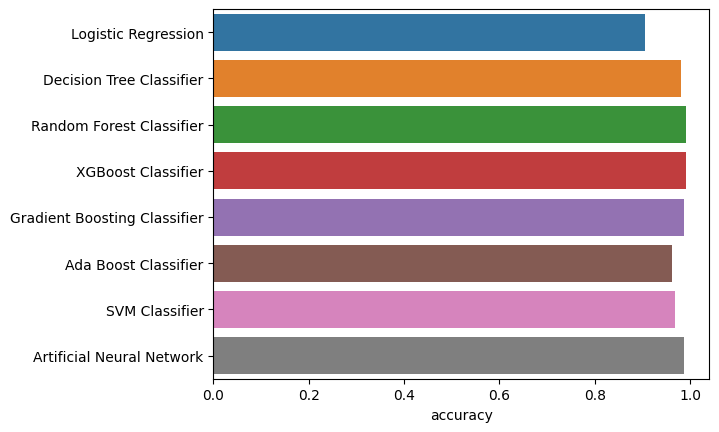

In [82]:
accuracy = result.iloc[0]
sns.barplot(x=accuracy, y=accuracy.index)

<Axes: xlabel='precision'>

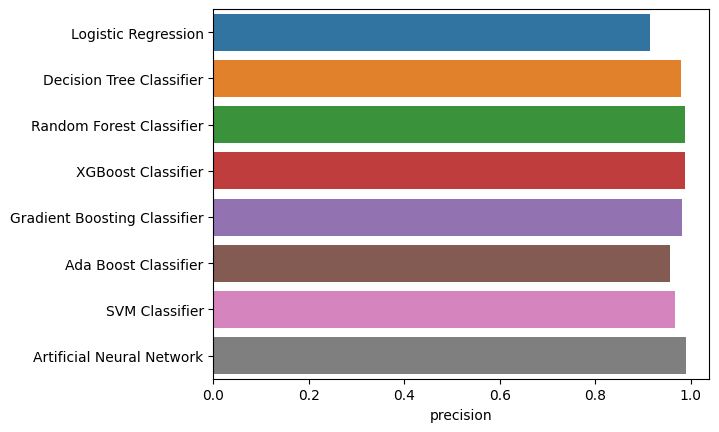

In [83]:
precision = result.iloc[1]
sns.barplot(x=precision, y=precision.index)

<Axes: xlabel='recall'>

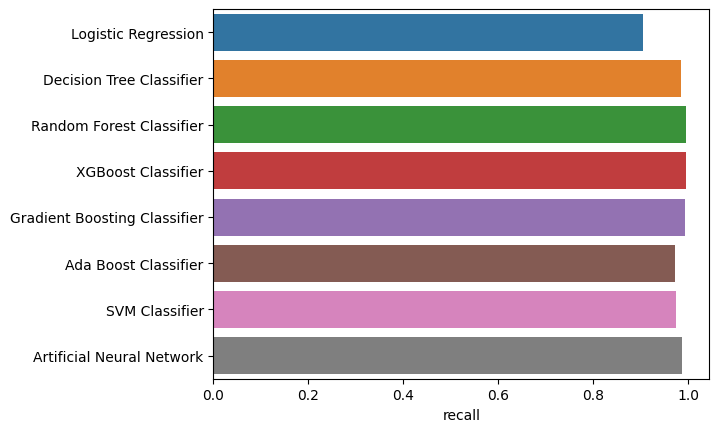

In [84]:
recall = result.iloc[2]
sns.barplot(x=recall, y=recall.index)

<Axes: xlabel='f1'>

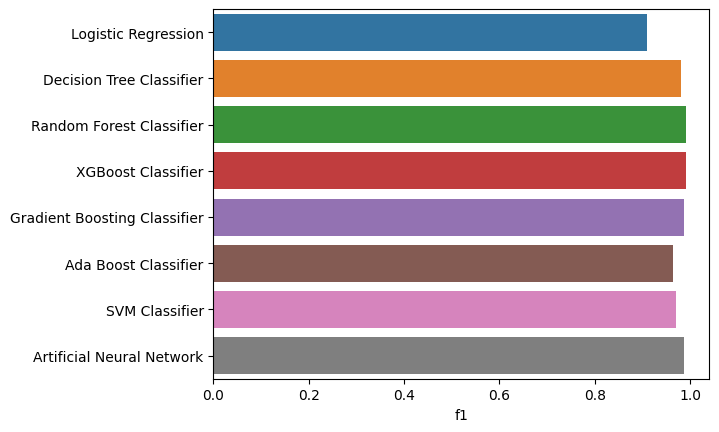

In [85]:
f1 = result.iloc[3]
sns.barplot(x=f1, y=f1.index)

### Conclusion: XGBoost is giving best results